### $\color{royalblue}{\text{ Osma vježba iz numeričkih metoda u astronomiji (NMA), datum: 19.12.2024.}} $

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import vector as v
import utils as ut

### $\color{magenta}{\text{1. NUMERIČKA INTEGRACIJA DIFERENCIJALNIH JEDNAČINA - nastavak.}} $

### 1.1. Leapfrog integrator.

Leapfrog integrator je numerička metoda koja se koristi za rješavanje diferencijalnih jednačina,

a posebno za sisteme koji uključuju kretanje tijela pod dejstvom gravitacije ili drugih sila. Glavna

prednost algoritma je očuvanje energije i stabilnost tokom dužih simulacija.

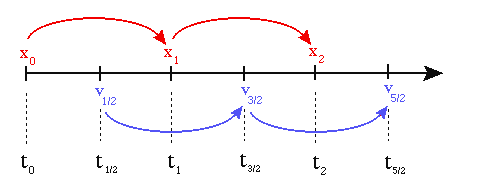

Grafički prikaz Leapfrog metode.

Želimo simulirati kretanje Zemlje pod gravitacionim uticajem Sunca. Početni položaji ($x_0$, $y_0$) i brzine 

($v_{x,0}$, $v_{y,0}$) su definisani. Početna ukupna energija sistema računa se kao zbir kinetičke i potencijalne energije:

$$
E_0 = \frac{1}{2} m \left(v_{x,0}^2 + v_{y,0}^2\right) - \frac{G M m}{\sqrt{x_0^2 + y_0^2}}.
$$

Leapfrog algoritam sadrži sljedeće (neformalne) korake:

1. korak (ubrzanje se izračunava preko trenutnog položaja):

$$
a_{x,n} = -\frac{G M}{r_{n}^3} \cdot x_{n},\,\,\, a_{y,n} = -\frac{G M}{r_{n}^3} \cdot y_{n},
$$

gdje je $r_n = \sqrt{x_n^2 + y_n^2}$.

2. korak (ažuriranje brzine na polovini koraka $\color{red}{(t+\frac{\Delta t}{2})}$):

$$
v_{x,n+\frac{1}{2}} = v_{x,n} + a_{x,n} \cdot \frac{\Delta t}{2},\,\,\,v_{y,n+\frac{1}{2}} = v_{y,n} + a_{y,n} \cdot \frac{\Delta t}{2}.
$$

3. korak (ažuriranje položaja na cijelom vremenskom koraku $(t+\Delta t)$):

$$
x_{n+1} = x_n + v_{x,n+\frac{1}{2}} \cdot \Delta t,\,\,\, y_{n+1} = y_n + v_{y,n+\frac{1}{2}} \cdot \Delta t, 
$$

gdje se uzima u obzir da se položaj mijenja na osnovu srednje brzine tokom vremenskog koraka.

4. korak (novi položaj omogućava izračunavanje sljedećeg ubrzanja):

$$
a_{x, n+1} = -\frac{G M}{r_{n+1}^3} \cdot x_{n+1},\,\,\, a_{y, n+1} = -\frac{G M}{r_{n+1}^3} \cdot y_{n+1}.
$$

5. korak (izračun nove brzine  na kraju vremenskog koraka, koristeći novo ubrzanje):

$$
v_{x,n+1} = v_{x,n+\frac{1}{2}} + a_{x,n+1} \cdot \frac{\Delta t}{2}, v_{y,n+1} = v_{y,n+\frac{1}{2}} + a_{y,n+1} \cdot \frac{\Delta t}{2}.
$$

Zbog naizmjeničnog ažuriranja ubrzanja i brzine, greške se minimizuju.

Kinetička i potencijalna energija za naredni vremenski korak se računaju preko:

$$
T_{n+1} = \frac{1}{2} m \left(v_{x,n+1}^2 + v_{y,n+1}^2\right),\,\,\,U_{n+1} = -\frac{G M m}{r_{n+1}},
$$

odakle se dobija ukupna energija u narednom vremenskom koraku:

$$
E_{n+1} = T_{n+1} + U_{n+1}.
$$

Relativna greška za energiju u svakom koraku nalazi se preko:
$$
\Delta E_n = \frac{E_0 - E_n}{E_0}.
$$

Sada prelazimo na kod.

In [134]:
start = time.time()

M = 1.989e30 # masa Sunca [kg]
m = 5.972e24 # masa Zemlje [kg]
G = 6.67408e-11 # gravitaciona konstanta [Nm²/kg²]
au = 149597870700. # astronomska jedinica [m]

dt = 10 * 86400 # vremenski korak od 10 dana u sekundama
tlim = 100000 * 365.25 * 86400 # simulacija za 100.000 godina

x0 = au # početni položaji i brzine
y0 = 0
vx0 = 0
vy0 = 29.5 * 1000 # orbitalna brzina Zemlje [m/s]

x = [x0]
y = [y0]
vx = [vx0]
vy = [vy0]

E0 = m * (vx[-1]**2 + vy[-1]**2)/2 - G * M * m/(x[-1]**2 + y[-1]**2) # početna energija
E = [E0]
dE = [0] # relativne greške u energiji
vrijeme = [0]
t = 0

while t < tlim:
    
    ax = -G * (M/(x[-1]**2 + y[-1]**2)**(3/2)) * x[-1]
    ay = -G * (M/(x[-1]**2 + y[-1]**2)**(3/2)) * y[-1]
    
    vx12 = vx[-1] + ax * (dt/2)
    vy12 = vy[-1] + ay * (dt/2)
    
    x.append(x[-1]+vx12*dt)
    y.append(y[-1]+vy12*dt)    
    
    ax = -G * (M/(x[-1]**2 + y[-1]**2)**(3/2)) * x[-1]
    ay = -G * (M/(x[-1]**2 + y[-1]**2)**(3/2)) * y[-1]
    
    vx.append(vx12 + ax * dt/2)
    vy.append(vy12 + ay * dt/2)
    
    E.append(m * (vx[-1]**2 + vy[-1]**2)/2 - G * M * m/(x[-1]**2 + y[-1]**2))
    dE.append((E0 - E[-1])/E0)
    t += dt
    vrijeme.append(t)
    
end = time.time()
print(f'Vrijeme izvršavanja za Leapfrog algoritam: {end - start:.2f} s.')

Vrijeme izvršavanja za Leapfrog algoritam: 13.77 s.


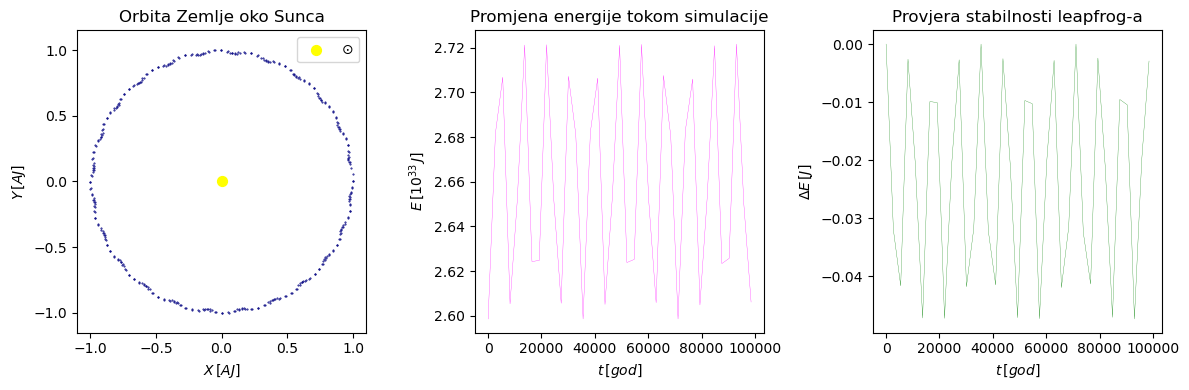

In [137]:
# plt.rcParams['agg.path.chunksize'] = 10000 # broj procesuiranih tačaka u koraku
# plt.rcParams['path.simplify'] = True  # pojednostavljivanje
# plt.rcParams['path.simplify_threshold'] = 0.1  # prag pojednostavljivanja

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(np.array(x)[::10000]/au, np.array(y)[::10000]/au, s=0.2, color='navy')
plt.scatter(0, 0, color='yellow', s=50, label=r'$\odot$') 
plt.xlabel(r'$X\,[AJ]$')
plt.ylabel(r'$Y\,[AJ]$')
plt.title('Orbita Zemlje oko Sunca')
plt.axis('equal')
plt.legend()

plt.subplot(132)
plt.plot(np.array(vrijeme[::100000]) / (365.25 * 86400), np.array(E)[::100000] / 1e33, 
         color='magenta', linewidth=0.2)
plt.xlabel(r'$t\,[god]$')
plt.ylabel(r'$E\,[10^{33}\,J]$')
plt.title('Promjena energije tokom simulacije')

plt.subplot(133)
plt.plot(np.array(vrijeme[::100000]) / (365.25 * 86400), np.array(dE)[::100000], 
         color='green', linewidth=0.2)
plt.xlabel(r'$t\,[god]$')
plt.ylabel(r'$\Delta E\,[J]$')
plt.title('Provjera stabilnosti leapfrog-a')

plt.tight_layout()
plt.show()

Veličina $\Delta E$ bi trebalo malo da se mijenja ako je metoda stabilna.

### 1.2. Leapfrog integrator na malo drugačijem primjeru.
Zanimljivo je simulirati problem tri tijela (Saturn, Enkelad, Diona) sa uključenim gravitacionim uticajima.

Orbitalni period Enkelada je $T_E\approx1.37\,d$, a orbitalni period Dione je $T_D\approx2.74\,d$.

In [197]:
ms = 5.68e26  # masa Saturna [kg]

me = 1.08e20 # masa Enkelada [kg]
re = np.array([2.38e8, 0]) # početni položaj Enkelada [m]
ve = np.array([0, 12600.0]) # početna brzina Enkelada [m/s]

md = 1.09e21 # masa Dione
rd = np.array([3.77396e8, 0]) # početni položaj Dione [m]
vd = np.array([0, 10000.0]) # početna brzina Dione [m/s]

dt = 1
t_lim = 3 * 24 * 3600 # trajanje simulacije (3 dana)
n = t_lim/dt

Sada, navodimo opšte stvari koje nam služe da definišemo funkciju koja računa ubrzanje.

$$
\vec{r}_{\text{diff}} = \vec{r}_2 - \vec{r}_1,
$$

$$
|\vec{r}| = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2},
$$

$$
\vec{a} = G \cdot \frac{m_2}{|\vec{r}|^3} \cdot \vec{r}_{\text{diff}},
$$

$$
a_x = G \cdot \frac{m_2 \cdot (x_2 - x_1)}{|\vec{r}|^3}, \quad
a_y = G \cdot \frac{m_2 \cdot (y_2 - y_1)}{|\vec{r}|^3}, \quad
a_z = G \cdot \frac{m_2 \cdot (z_2 - z_1)}{|\vec{r}|^3}.
$$

In [204]:
def ubrzanje(r1, r2, m2, G):
    r_diff = r2 - r1  
    r_mag = np.linalg.norm(r_diff)  
    return G * m2 * r_diff / r_mag**3  

In [205]:
pocetak = time.time()

def leapfrog_simulacija(G, dt, t_lim, ms, me, re, ve, md, rd, vd):

    xe, ye = [re[0]], [re[1]]  # Enkelad
    xd, yd = [rd[0]], [rd[1]]  # Diona
    
    # praćenje promjene ubrzanja
    delta_acc = []  

    ae = ubrzanje(re, np.zeros(2), ms, G) + ubrzanje(re, rd, md, G)  # Enkelad
    ad = ubrzanje(rd, np.zeros(2), ms, G) + ubrzanje(rd, re, me, G)  # Diona

    for _ in range(int(t_lim / dt)):
        
        # ažuriranje brzina na polovini koraka
        ve += 0.5 * ae * dt
        vd += 0.5 * ad * dt

        # ažuriranje položaja
        re += ve * dt
        rd += vd * dt

        # čuvanje trenutnih položaja
        xe.append(re[0])
        ye.append(re[1])
        xd.append(rd[0])
        yd.append(rd[1])
        
        # računanje novih ubrzanja
        ae_novo = ubrzanje(re, np.zeros(2), ms, G) + ubrzanje(re, rd, md, G)
        ad_novo = ubrzanje(rd, np.zeros(2), ms, G) + ubrzanje(rd, re, me, G)

        # ažuriranje brzina sa novim ubrzanjima
        ve += 0.5 * ae_novo * dt
        vd += 0.5 * ad_novo * dt
   
        delta_acc.append(np.linalg.norm(ae_novo - ae) + np.linalg.norm(ad_novo - ad))
        ae, ad = ae_novo, ad_novo
    
    return xe, ye, xd, yd, delta_acc

xe, ye, xd, yd, delta_acc = leapfrog_simulacija(G, dt, t_lim, ms, me, re, ve, md, rd, vd)

end = time.time()
print(f'Vrijeme izvršavanja za Leapfrog algoritam: {end - start:.2f} s.')

Vrijeme izvršavanja za Leapfrog algoritam: 4671.42 s.


Velike promjene ubrzanja mogu ukazivati na numeričke greške ili fizički neočekivane promjene. Ako se ubrzanja

naglo mijenjaju, to takođe može ukazivati na gravitacionu interakciju ili bliske prolaze između satelita.

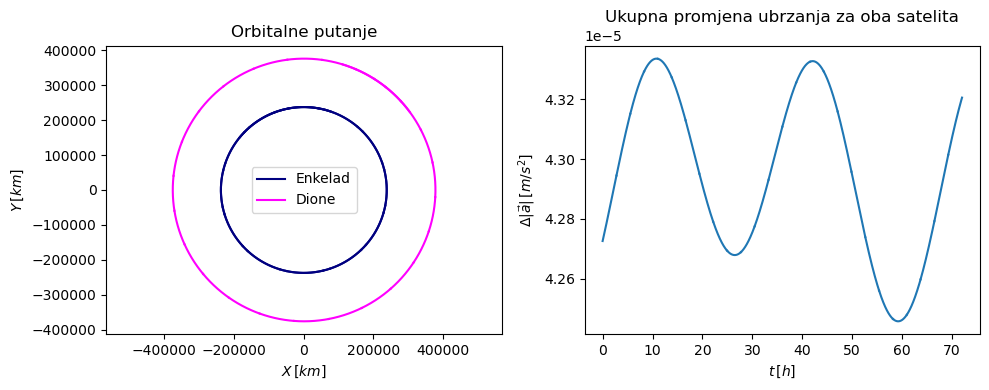

In [207]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(np.array(xe)/1000, np.array(ye)/1000, label='Enkelad', color='navy')
plt.plot(np.array(xd)/1000, np.array(yd)/1000, label='Dione', color='magenta')
plt.xlabel(r'$X\,[km]$')
plt.ylabel(r'$Y\,[km]$')
plt.axis('equal')
plt.legend()
plt.title('Orbitalne putanje')

tt = np.arange(0, len(delta_acc)) * dt / 3600  

plt.subplot(122)
plt.plot(tt, delta_acc) 
plt.xlabel(r'$t\,[h]$')
plt.ylabel(r'$\Delta |\vec{a}|\,[m/s^2]$')
plt.title('Ukupna promjena ubrzanja za oba satelita')

plt.tight_layout()
plt.show()

### 1.3. Zaključak: 

Leapfrog metoda ažurira brzine na polovini vremenskog koraka i koristi ih za ažuriranje položaja

u punim koracima. Položaji i brzine nisu sinhronizovani u istom trenutku. Algoritam je pogodan za 

simulacije dugotrajnih orbita i sistema sa velikim brojem tijela.


### Vježba:
Uporediti leapfrog sa Ojlerovom metodom, na nekom od navedenih primjera.

Pogledati šta je Verleov algoritam.
Takođe, preporuka je istražiti nešto o Jošida algoritmu.